# **Model Complexity Scores**
A major drawback in using prediction error on test data estimated using `cross-validation` for model selection is that itc an be *computationally expensive and intensive*. Many of times it maybe not possible to do this.

Therefore, an alternative is to use `model complexity scores` which are measures of performance that:
1. depend only on the training data (We don't need to split data into train validation and test.)
2. do not suffer from bias due to over-fitting on the training data.

### **Model Complexity Scores typically takes the form** ***Loss + Penalty*** .
- `loss`: captures the goodness of fit of the model to the training data. (How well the model approximate sthe training data?)
- `penalty`: accounts for adding more predictors to the model which balances the loss term which always decreases as more predictors are added to the model. (The more predictors we have, the penalty term should increase. therby discouraging it.)

Therefore, with this combination of loss part an dpenalty part the model is going to explain the training data well with less complexity.

We would like these scores to be as small as possible for the set of predictors that we choose to build the model. ***Therefore, we choose the model with the smallest model complexity score.***

# The Akaike Information Criterion (AIC)
- The AIC for a model built using `n` samples and `p` predictors is defined as:

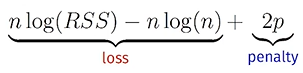

Here,
- `n`log(`n`) is a constant.
- The `loss part` basically captures the goodness of the fit. It invovlves the RSS which is a measure of fit of the model and a constant term plays no role in model selection. It is mathematically referred to as " the negative log likelihood".
- The `penalty part` is the balancing term which takes into account any additional predictor.

We want `loss(RSS)` as small as possible because `nlog(n)` is fixed/constant. We also want `p` to be as small as possible.

- The AIC approach tends to work well for underlying population models that are actually complex. (*Because the model that comes out of AIC as the criterion tends to generally have more predictors.*)


In [ ]:
install.packages(c("ggplot2", "dplyr", "mplot", "reshape", "leaps"))
library(ggplot2)
library(dplyr)
library(mplot)
library(reshape) # to melt the dataframe
library(leaps)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘grpreg’, ‘pls’, ‘rngtools’, ‘shape’, ‘RcppEigen’, ‘foreach’, ‘bestglm’, ‘doParallel’, ‘doRNG’, ‘plyr’, ‘shinydashboard’, ‘glmnet’, ‘googleVis’, ‘reshape2’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




In [ ]:
# Loading bodyfat data
data('bofyfat', package = 'mplot')
bfData = bodyfat %>% select(-c('Id')) #removing Id column
str(bfData)

Warning message in data("bofyfat", package = "mplot"):
“data set ‘bofyfat’ not found”


'data.frame':	128 obs. of  14 variables:
 $ Bodyfat: num  6.3 11.3 14.2 14.8 8 11.5 15.4 15.1 17.3 22.1 ...
 $ Age    : int  54 50 24 55 51 54 58 34 28 35 ...
 $ Weight : num  70.4 73.7 70.8 76.9 62.3 ...
 $ Height : num  69.2 66.5 70.8 68.2 67.8 ...
 $ Neck   : num  37.5 38.7 35.7 37.2 36.5 37.4 38 36 35.6 40.5 ...
 $ Chest  : num  89.3 99.4 92.7 101.7 89.7 ...
 $ Abdo   : num  78.4 86.7 81.9 91.1 82 87.6 88.1 83.4 83.5 96.4 ...
 $ Hip    : num  96.1 96.2 95.3 97.1 89.1 ...
 $ Thigh  : num  56 62.1 56.4 56.6 49.3 59.7 57.1 52.4 57.3 69 ...
 $ Knee   : num  37.4 39.3 36.5 38.5 33.7 40.2 38.9 35.6 37.8 39 ...
 $ Ankle  : num  22.4 23.3 22 22.6 21.4 23.4 23.6 20.4 21.7 23.1 ...
 $ Bic    : num  32.6 30.6 33.5 33.4 29.6 27.9 30.9 28.3 32.2 36.1 ...
 $ Fore   : num  28.1 27.8 28.3 29.3 26 27 29.6 26.2 27.7 30.5 ...
 $ Wrist  : num  18.1 18.2 17.3 18.8 16.9 17.8 18 16.5 17.7 18.2 ...


In [ ]:
# Forward stepwise selection using AIC
# Intercept-only model
model.lower = lm(data = bfData, Bodyfat ~ 1)
# Full model
model.upper = lm(data = bfData, Bodyfat ~ .)
model.step = step(model.lower, scope = list(lower = model.lower, upper = model.upper), direction = 'forward', k = 2)
# k is the multiple of the number of degrees of freedom used for the penalty which is log(n) for BIC and 2 for AIC
summary(model.step)
round(summary(model.step)$coef, 3)

Start:  AIC=525.59
Bodyfat ~ 1

         Df Sum of Sq    RSS    AIC
+ Abdo    1    5376.2 2274.9 372.34
+ Chest   1    4166.5 3484.7 426.93
+ Weight  1    3348.3 4302.9 453.92
+ Hip     1    3011.2 4640.0 463.58
+ Thigh   1    2089.3 5561.8 486.77
+ Bic     1    1848.4 5802.8 492.20
+ Knee    1    1819.1 5832.0 492.84
+ Neck    1    1652.8 5998.3 496.44
+ Wrist   1    1350.2 6300.9 502.74
+ Ankle   1     989.0 6662.2 509.88
+ Fore    1     886.5 6764.7 511.83
+ Age     1     495.1 7156.1 519.03
+ Height  1     175.3 7475.8 524.63
<none>                7651.2 525.59

Step:  AIC=372.34
Bodyfat ~ Abdo

         Df Sum of Sq    RSS    AIC
+ Weight  1   228.962 2046.0 360.76
+ Neck    1   191.968 2082.9 363.06
+ Hip     1   180.253 2094.7 363.78
+ Wrist   1   134.105 2140.8 366.56
+ Ankle   1   119.710 2155.2 367.42
+ Knee    1   113.440 2161.5 367.79
+ Thigh   1    94.488 2180.4 368.91
+ Height  1    64.441 2210.5 370.66
+ Bic     1    53.419 2221.5 371.30
<none>                2274.9 372.


Call:
lm(formula = Bodyfat ~ Abdo + Weight + Neck + Fore, data = bfData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1637 -2.8476  0.0877  2.7522  8.3342 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.88325    8.30967  -5.040 1.62e-06 ***
Abdo          0.98046    0.08146  12.036  < 2e-16 ***
Weight       -0.22932    0.07868  -2.915  0.00423 ** 
Neck         -0.61856    0.26606  -2.325  0.02172 *  
Fore          0.43409    0.23834   1.821  0.07099 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.971 on 123 degrees of freedom
Multiple R-squared:  0.7466,	Adjusted R-squared:  0.7383 
F-statistic: 90.58 on 4 and 123 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-41.883,8.310,-5.040,0.000
Abdo,0.980,0.081,12.036,0.000
Weight,-0.229,0.079,-2.915,0.004
Neck,-0.619,0.266,-2.325,0.022
Fore,0.434,0.238,1.821,0.071


Here, "k = 2" is the `penalty term` that we set in the step function. This is the metric that we are using for AIC for model selection.

The hallmark features of AIC for model selection is that the model tends to select more predictors which in general do not lend much of an interpretability in the resulting model.

**Similarly, let's try backward selection:**

In [ ]:
# Backward stepwise selection using BIC
# Intercept-only model
model.lower = lm(data = bfData, Bodyfat ~ 1)
# Full model
model.upper = lm(data = bfData, Bodyfat ~ .)
model.step = step(model.upper, scope = list(lower = model.lower, upper = model.upper), direction = 'backward', k = 2)
summary(model.step)
round(summary(model.step)$coef, 3)

Start:  AIC=373.2
Bodyfat ~ Age + Weight + Height + Neck + Chest + Abdo + Hip + 
    Thigh + Knee + Ankle + Bic + Fore + Wrist

         Df Sum of Sq    RSS    AIC
- Ankle   1      0.15 1898.7 371.21
- Age     1      0.76 1899.3 371.25
- Knee    1      1.47 1900.1 371.29
- Bic     1      1.59 1900.2 371.30
- Wrist   1      2.08 1900.7 371.34
- Thigh   1      4.24 1902.8 371.48
- Chest   1      5.07 1903.7 371.54
- Hip     1      8.03 1906.6 371.74
- Height  1     10.80 1909.4 371.92
- Weight  1     20.62 1919.2 372.58
<none>                1898.6 373.20
- Fore    1     38.19 1936.8 373.74
- Neck    1     56.38 1955.0 374.94
- Abdo    1   1088.97 2987.6 429.22

Step:  AIC=371.21
Bodyfat ~ Age + Weight + Height + Neck + Chest + Abdo + Hip + 
    Thigh + Knee + Bic + Fore + Wrist

         Df Sum of Sq    RSS    AIC
- Age     1      0.84 1899.6 369.26
- Bic     1      1.90 1900.6 369.33
- Knee    1      1.92 1900.7 369.33
- Wrist   1      2.64 1901.4 369.38
- Thigh   1      4.15 1902.9 36


Call:
lm(formula = Bodyfat ~ Weight + Neck + Abdo + Fore, data = bfData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1637 -2.8476  0.0877  2.7522  8.3342 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.88325    8.30967  -5.040 1.62e-06 ***
Weight       -0.22932    0.07868  -2.915  0.00423 ** 
Neck         -0.61856    0.26606  -2.325  0.02172 *  
Abdo          0.98046    0.08146  12.036  < 2e-16 ***
Fore          0.43409    0.23834   1.821  0.07099 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.971 on 123 degrees of freedom
Multiple R-squared:  0.7466,	Adjusted R-squared:  0.7383 
F-statistic: 90.58 on 4 and 123 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-41.883,8.310,-5.040,0.000
Weight,-0.229,0.079,-2.915,0.004
Neck,-0.619,0.266,-2.325,0.022
Abdo,0.980,0.081,12.036,0.000
Fore,0.434,0.238,1.821,0.071


Here, we again got the same 4 features.
In both approaches we got predictors that are not intuitively interpretable.

--------

# The Bayesian Information Criterion (BIC)

The BIC for a model built using `n` samples and `p` predictors is defined as:

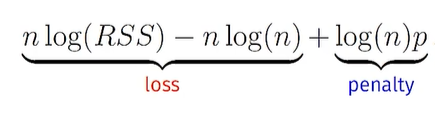

Here,
- the `loss term` is exactly the same as AIC.
- the `penalty term` balances the predictability by putting a sort of pressure in the numbers of predictors.
- Instead of `2` in the "K", we have log(`n`) {**K = log(n)**}

For example: In bodyfat dataset `log(128) `is `4.8` so we get `4.8p` Where in ***AIC*** we had `2p` making *AIC choose more predictors*.

Going to the codes we can see:


In [ ]:
# Forward stepwise selection using BIC
# Intercept-only model
model.lower = lm(data = bfData, Bodyfat ~ 1)
# Full model
model.upper = lm(data = bfData, Bodyfat ~ .)
model.step = step(model.lower, scope = list(lower = model.lower, upper = model.upper), direction = 'forward', k = log(128))
# k is the multiple of the number of degrees of freedom used for the penalty term which is log(n) for BIC and 2 for AIC
summary(model.step)
round(summary(model.step)$coef, 3)

Start:  AIC=528.45
Bodyfat ~ 1

         Df Sum of Sq    RSS    AIC
+ Abdo    1    5376.2 2274.9 378.05
+ Chest   1    4166.5 3484.7 432.63
+ Weight  1    3348.3 4302.9 459.63
+ Hip     1    3011.2 4640.0 469.28
+ Thigh   1    2089.3 5561.8 492.48
+ Bic     1    1848.4 5802.8 497.90
+ Knee    1    1819.1 5832.0 498.55
+ Neck    1    1652.8 5998.3 502.15
+ Wrist   1    1350.2 6300.9 508.45
+ Ankle   1     989.0 6662.2 515.58
+ Fore    1     886.5 6764.7 517.54
+ Age     1     495.1 7156.1 524.74
<none>                7651.2 528.45
+ Height  1     175.3 7475.8 530.33

Step:  AIC=378.05
Bodyfat ~ Abdo

         Df Sum of Sq    RSS    AIC
+ Weight  1   228.962 2046.0 369.32
+ Neck    1   191.968 2082.9 371.61
+ Hip     1   180.253 2094.7 372.33
+ Wrist   1   134.105 2140.8 375.12
+ Ankle   1   119.710 2155.2 375.98
+ Knee    1   113.440 2161.5 376.35
+ Thigh   1    94.488 2180.4 377.47
<none>                2274.9 378.05
+ Height  1    64.441 2210.5 379.22
+ Bic     1    53.419 2221.5 379.


Call:
lm(formula = Bodyfat ~ Abdo + Weight, data = bfData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1441 -2.5621 -0.0781  2.9580  9.0413 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -47.99121    3.69071  -13.00  < 2e-16 ***
Abdo          0.93880    0.07995   11.74  < 2e-16 ***
Weight       -0.24257    0.06486   -3.74 0.000279 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.046 on 125 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.7283 
F-statistic: 171.2 on 2 and 125 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-47.991,3.691,-13.003,0
Abdo,0.939,0.080,11.743,0
Weight,-0.243,0.065,-3.740,0


In [ ]:
# Backward stepwise selection using BIC
# Intercept-only model
model.lower = lm(data = bfData, Bodyfat ~ 1)
# Full model
model.upper = lm(data = bfData, Bodyfat ~ .)
model.step = step(model.upper, scope = list(lower = model.lower, upper = model.upper), direction = 'backward', k = log(nrow(bfData)))
summary(model.step)
round(summary(model.step)$coef, 3)

Start:  AIC=413.12
Bodyfat ~ Age + Weight + Height + Neck + Chest + Abdo + Hip + 
    Thigh + Knee + Ankle + Bic + Fore + Wrist

         Df Sum of Sq    RSS    AIC
- Ankle   1      0.15 1898.7 408.28
- Age     1      0.76 1899.3 408.32
- Knee    1      1.47 1900.1 408.37
- Bic     1      1.59 1900.2 408.38
- Wrist   1      2.08 1900.7 408.41
- Thigh   1      4.24 1902.8 408.56
- Chest   1      5.07 1903.7 408.61
- Hip     1      8.03 1906.6 408.81
- Height  1     10.80 1909.4 409.00
- Weight  1     20.62 1919.2 409.65
- Fore    1     38.19 1936.8 410.82
- Neck    1     56.38 1955.0 412.02
<none>                1898.6 413.12
- Abdo    1   1088.97 2987.6 466.30

Step:  AIC=408.28
Bodyfat ~ Age + Weight + Height + Neck + Chest + Abdo + Hip + 
    Thigh + Knee + Bic + Fore + Wrist

         Df Sum of Sq    RSS    AIC
- Age     1      0.84 1899.6 403.49
- Bic     1      1.90 1900.6 403.56
- Knee    1      1.92 1900.7 403.56
- Wrist   1      2.64 1901.4 403.61
- Thigh   1      4.15 1902.9 4


Call:
lm(formula = Bodyfat ~ Weight + Abdo, data = bfData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1441 -2.5621 -0.0781  2.9580  9.0413 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -47.99121    3.69071  -13.00  < 2e-16 ***
Weight       -0.24257    0.06486   -3.74 0.000279 ***
Abdo          0.93880    0.07995   11.74  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.046 on 125 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.7283 
F-statistic: 171.2 on 2 and 125 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-47.991,3.691,-13.003,0
Weight,-0.243,0.065,-3.740,0
Abdo,0.939,0.080,11.743,0


BIC typically works well for problems where the underlying population model is already simple. Where we do not need many predictors to explain the already simple population model.

THe resultiung models typically:
1. have a small number of predictors
2. have optimal predictive ability
3. have high interpretability

## Which to choose?
First we should have an understanding of the underlying population model. Is it already complex or is it simple to a certain extent according to our understanding. Depending on these criterion we can select the model which is an advantage over doing a `train test validation test` followed by `cross validation` and calcualting the prediction error on the test data set and selecting the model.